In [1]:
import pandas as pd
import numpy as np
import missingno as msno
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
import sys
import os

import IPython.display as ipd
from IPython.display  import Audio

pd.set_option("display.max_columns",200)
pd.set_option("display.max_rows",100)
%matplotlib inline

In [2]:
sys.path.insert(1, '../user_lib')
import woe
import completitud as comple
import limpia_texto as clntxt
import atipicos as atp
import estadisticos as estats
import graphixs as graph
import arboles as trees

# TODO
## 1. Importar los datos
## 2. Proceso de calidad de datos
- Etiquetado de variables
- Revisión de duplicados
- Completitud

## 3. Análisis Exploratorio
- Visualizaciones

## 4. Revisión de datos anómalos

## 5. Tratamiento de valores faltantes

## 6. Tabla final

# 1. Importar los datos

In [3]:
data_path = '../data/'
os.listdir(data_path)

['.DS_Store',
 'datos_musica_new.csv',
 'audio',
 '.gitignore',
 'spectrograms',
 'datos_musica_new_sa.csv']

In [4]:
df = pd.read_csv(data_path + 'datos_musica_new.csv', encoding='utf8')

# 2. Proceso de calidad de datos

In [5]:
df.head()

archivo  zero_cr  spectral_centroid  spectral_bw  \
0            crop_139ORACION.mp3       18        3718.611460  4018.727749   
1        crop_08Seek&Destroy.mp3        7        3939.607756  3609.940440   
2       crop_02Rollercoaster.mp3       14        3520.858827  3781.587057   
3    crop_11BringEmBackAlive.mp3        4        3170.852573  3558.395446   
4  crop_4-04BodomBeachTerror.mp3        0        3031.185078  3008.042682   

   spectral_rf     croma  norm_main_signal  norm_amplitude_db      mfcc_1  \
0  8496.157681  0.445984       27198.66602        67515.32813  -63.776653   
1  7792.548149  0.521793       12548.87109        80284.07813 -120.306099   
2  7853.945273  0.589852       25798.61133        78596.86719  -91.056770   
3  7077.203394  0.478351       30418.28320        71925.75781  -55.035664   
4  6038.769985  0.609179       33014.41406        75295.16406  -32.878361   

       mfcc_2     mfcc_3     mfcc_4     mfcc_5     mfcc_6     mfcc_7  \
0  120.569939 -27.781075  55.227997 -13.120267  44.324890 -19.253584   
1  110.507179 -55.008266  60.533909  -4.303230  28.537308 -19.065107   
2  136.933136 -25.539619  34.552818 -17.252773  31.749672 -15.516705   
3  134.748535 -36.235176  54.622887 -11.031491  41.575623 -11.967165   
4  140.106186 -68.551979  58.522602 -11.411274  31.303116  -2.930590   

      mfcc_8     mfcc_9    mfcc_10   mfcc_11    mfcc_12   mfcc_13   mfcc_14  \
0  20.555710 -12.720412  10.786198 -8.986979   6.804733 -2.328667  2.900476   
1  20.665205  -7.360394  13.713191 -3.508204  11.447392 -3.354587  3.111072   
2  22.577166 -11.772463  20.277536 -5.628073  13.310594 -3.628814  5.675441   
3  21.469402  -7.646917  10.554090 -3.116514   4.732285 -1.134986  2.137828   
4  23.466887   2.560016  17.451509 -1.017287   5.120934  6.781217 -0.232262   

    mfcc_15    mfcc_16   mfcc_17   mfcc_18   mfcc_19   mfcc_20         BPM  \
0  1.404809  -5.159079  1.606270 -5.578994  5.258808 -5.577647  107.666016   
1 -2.796549 -10.310349 -2.340406 -7.850484  2.950904 -8.729319  139.674831   
2  1.156862   0.878585  3.190184 -2.802731  6.372932 -4.543976   97.508844   
3 -3.307989  -4.235019  0.886602 -5.472085  3.519587 -4.259108  129.199219   
4  2.245883  -1.299501  2.268726 -1.357315  2.677248 -4.299150  143.554688   

     auto_c target  
0  0.669199     mg  
1  0.734163     mg  
2  0.328608     mg  
3  0.621544     mg  
4  0.642062     mg

In [6]:
df.shape

(1173, 31)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1173 entries, 0 to 1172
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   archivo            1173 non-null   object 
 1   zero_cr            1173 non-null   int64  
 2   spectral_centroid  1173 non-null   float64
 3   spectral_bw        1173 non-null   float64
 4   spectral_rf        1173 non-null   float64
 5   croma              1173 non-null   float64
 6   norm_main_signal   1173 non-null   float64
 7   norm_amplitude_db  1173 non-null   float64
 8   mfcc_1             1173 non-null   float64
 9   mfcc_2             1173 non-null   float64
 10  mfcc_3             1173 non-null   float64
 11  mfcc_4             1173 non-null   float64
 12  mfcc_5             1173 non-null   float64
 13  mfcc_6             1173 non-null   float64
 14  mfcc_7             1173 non-null   float64
 15  mfcc_8             1173 non-null   float64
 16  mfcc_9             1173 

### Etiquetado de variables

In [8]:
cols = list(df.columns)
cols

['archivo',
 'zero_cr',
 'spectral_centroid',
 'spectral_bw',
 'spectral_rf',
 'croma',
 'norm_main_signal',
 'norm_amplitude_db',
 'mfcc_1',
 'mfcc_2',
 'mfcc_3',
 'mfcc_4',
 'mfcc_5',
 'mfcc_6',
 'mfcc_7',
 'mfcc_8',
 'mfcc_9',
 'mfcc_10',
 'mfcc_11',
 'mfcc_12',
 'mfcc_13',
 'mfcc_14',
 'mfcc_15',
 'mfcc_16',
 'mfcc_17',
 'mfcc_18',
 'mfcc_19',
 'mfcc_20',
 'BPM',
 'auto_c',
 'target']

In [9]:
vars_c = ['zero_cr',
         'spectral_centroid',
         'spectral_bw',
         'spectral_rf',
         'croma',
         'norm_main_signal',
         'norm_amplitude_db',
         'mfcc_1',
         'mfcc_2',
         'mfcc_3',
         'mfcc_4',
         'mfcc_5',
         'mfcc_6',
         'mfcc_7',
         'mfcc_8',
         'mfcc_9',
         'mfcc_10',
         'mfcc_11',
         'mfcc_12',
         'mfcc_13',
         'mfcc_14',
         'mfcc_15',
         'mfcc_16',
         'mfcc_17',
         'mfcc_18',
         'mfcc_19',
         'mfcc_20',
         'BPM',
         'auto_c']

In [10]:
var_t = ['archivo']

In [11]:
df.rename(columns=dict(zip(vars_c, ('c_' + i.lower() for i in vars_c))), inplace=True)

In [12]:
df.rename(columns=dict(zip(var_t, ('t_' + i.lower() for i in var_t))), inplace=True)

In [13]:
df.rename(columns={'target':'tgt'}, inplace=True)

In [14]:
df.head()

t_archivo  c_zero_cr  c_spectral_centroid  \
0            crop_139ORACION.mp3         18          3718.611460   
1        crop_08Seek&Destroy.mp3          7          3939.607756   
2       crop_02Rollercoaster.mp3         14          3520.858827   
3    crop_11BringEmBackAlive.mp3          4          3170.852573   
4  crop_4-04BodomBeachTerror.mp3          0          3031.185078   

   c_spectral_bw  c_spectral_rf   c_croma  c_norm_main_signal  \
0    4018.727749    8496.157681  0.445984         27198.66602   
1    3609.940440    7792.548149  0.521793         12548.87109   
2    3781.587057    7853.945273  0.589852         25798.61133   
3    3558.395446    7077.203394  0.478351         30418.28320   
4    3008.042682    6038.769985  0.609179         33014.41406   

   c_norm_amplitude_db    c_mfcc_1    c_mfcc_2   c_mfcc_3   c_mfcc_4  \
0          67515.32813  -63.776653  120.569939 -27.781075  55.227997   
1          80284.07813 -120.306099  110.507179 -55.008266  60.533909   
2          78596.86719  -91.056770  136.933136 -25.539619  34.552818   
3          71925.75781  -55.035664  134.748535 -36.235176  54.622887   
4          75295.16406  -32.878361  140.106186 -68.551979  58.522602   

    c_mfcc_5   c_mfcc_6   c_mfcc_7   c_mfcc_8   c_mfcc_9  c_mfcc_10  \
0 -13.120267  44.324890 -19.253584  20.555710 -12.720412  10.786198   
1  -4.303230  28.537308 -19.065107  20.665205  -7.360394  13.713191   
2 -17.252773  31.749672 -15.516705  22.577166 -11.772463  20.277536   
3 -11.031491  41.575623 -11.967165  21.469402  -7.646917  10.554090   
4 -11.411274  31.303116  -2.930590  23.466887   2.560016  17.451509   

   c_mfcc_11  c_mfcc_12  c_mfcc_13  c_mfcc_14  c_mfcc_15  c_mfcc_16  \
0  -8.986979   6.804733  -2.328667   2.900476   1.404809  -5.159079   
1  -3.508204  11.447392  -3.354587   3.111072  -2.796549 -10.310349   
2  -5.628073  13.310594  -3.628814   5.675441   1.156862   0.878585   
3  -3.116514   4.732285  -1.134986   2.137828  -3.307989  -4.235019   
4  -1.017287   5.120934   6.781217  -0.232262   2.245883  -1.299501   

   c_mfcc_17  c_mfcc_18  c_mfcc_19  c_mfcc_20       c_bpm  c_auto_c tgt  
0   1.606270  -5.578994   5.258808  -5.577647  107.666016  0.669199  mg  
1  -2.340406  -7.850484   2.950904  -8.729319  139.674831  0.734163  mg  
2   3.190184  -2.802731   6.372932  -4.543976   97.508844  0.328608  mg  
3   0.886602  -5.472085   3.519587  -4.259108  129.199219  0.621544  mg  
4   2.268726  -1.357315   2.677248  -4.299150  143.554688  0.642062  mg

### Revisión de duplicados

In [15]:
df.duplicated().sum()

0

### Completitud

<AxesSubplot:>

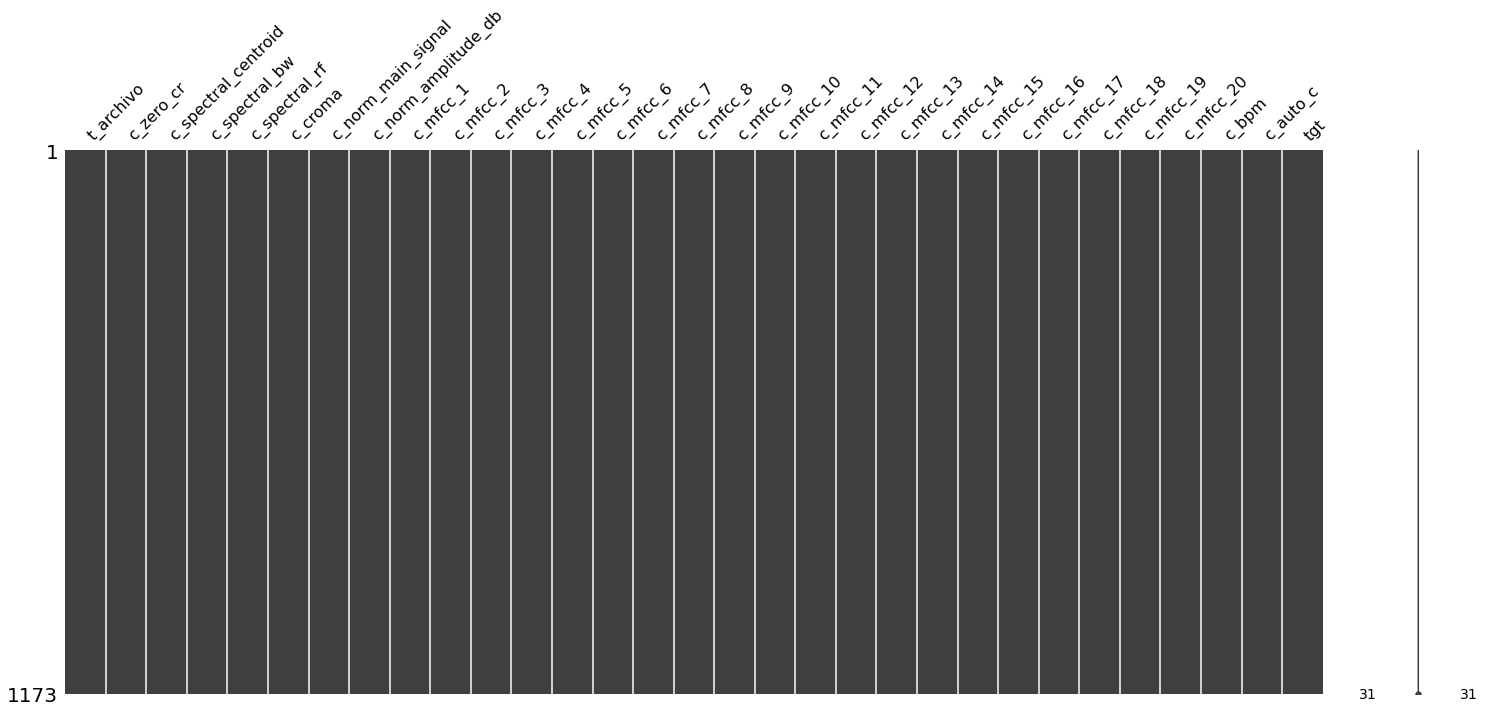

In [16]:
msno.matrix(df)

In [17]:
comple.completitud(df)

columna  total faltantes  completitud
0             t_archivo                0        100.0
28                c_bpm                0        100.0
27            c_mfcc_20                0        100.0
26            c_mfcc_19                0        100.0
25            c_mfcc_18                0        100.0
24            c_mfcc_17                0        100.0
23            c_mfcc_16                0        100.0
22            c_mfcc_15                0        100.0
21            c_mfcc_14                0        100.0
20            c_mfcc_13                0        100.0
19            c_mfcc_12                0        100.0
18            c_mfcc_11                0        100.0
17            c_mfcc_10                0        100.0
16             c_mfcc_9                0        100.0
29             c_auto_c                0        100.0
15             c_mfcc_8                0        100.0
13             c_mfcc_6                0        100.0
12             c_mfcc_5                0        100.0
11             c_mfcc_4                0        100.0
10             c_mfcc_3                0        100.0
9              c_mfcc_2                0        100.0
8              c_mfcc_1                0        100.0
7   c_norm_amplitude_db                0        100.0
6    c_norm_main_signal                0        100.0
5               c_croma                0        100.0
4         c_spectral_rf                0        100.0
3         c_spectral_bw                0        100.0
2   c_spectral_centroid                0        100.0
1             c_zero_cr                0        100.0
14             c_mfcc_7                0        100.0
30                  tgt                0        100.0

# 3. Análisis exploratorio

In [18]:
viz_path = '../user_viz/'

In [19]:
df_mg = df[df['tgt'] == 'mg']
df_no = df[df['tgt'] == 'no']

In [20]:
continuas = list(df.filter(like='c_').columns)

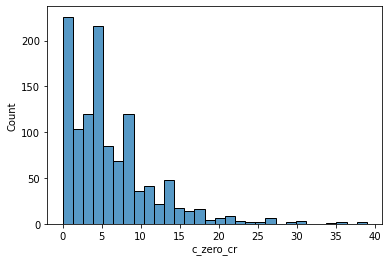

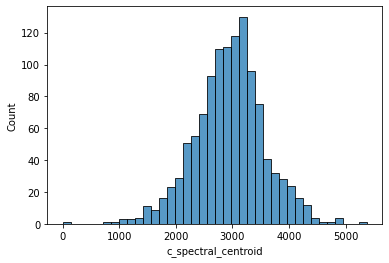

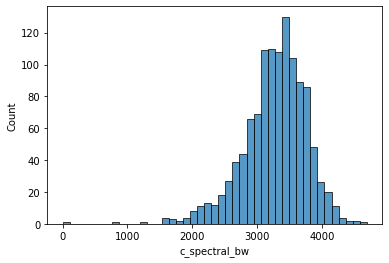

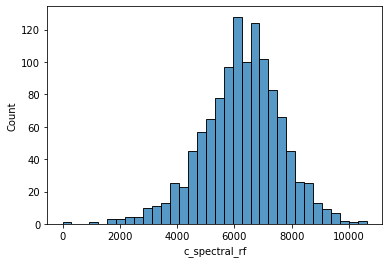

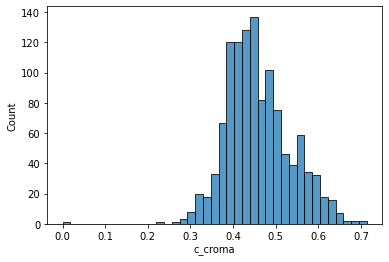

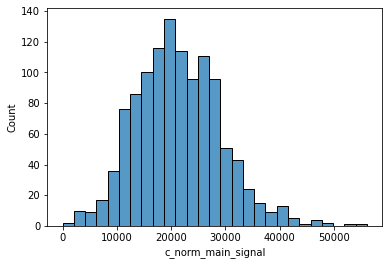

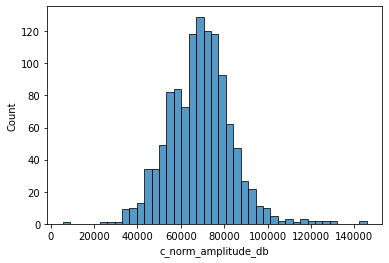

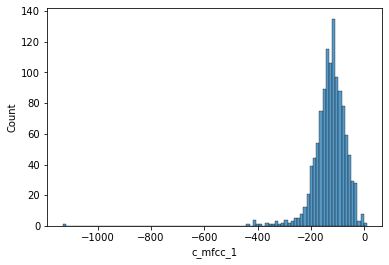

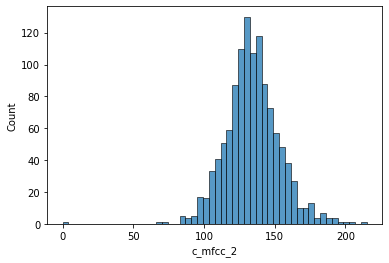

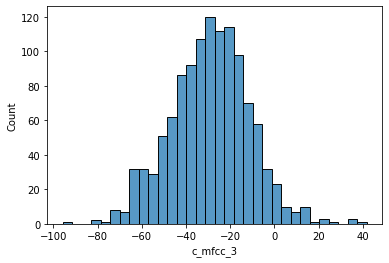

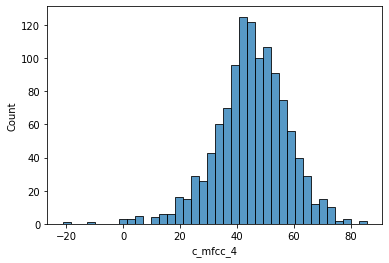

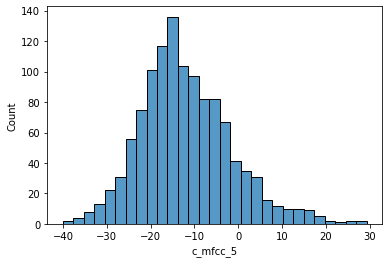

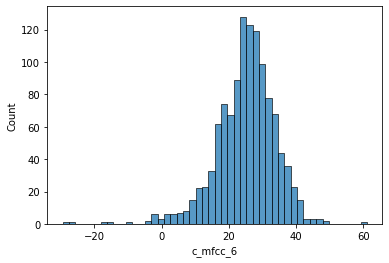

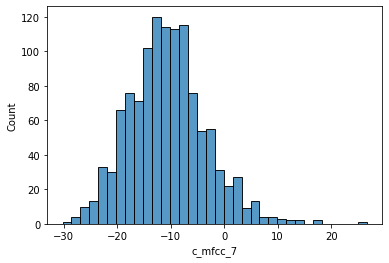

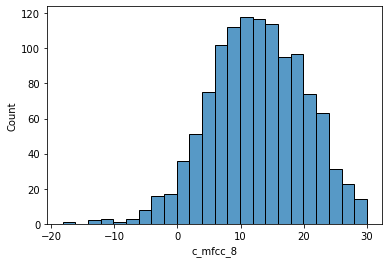

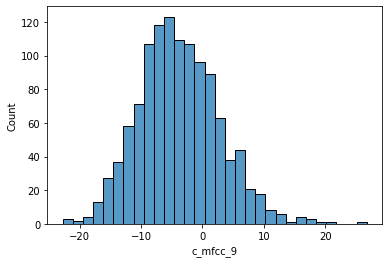

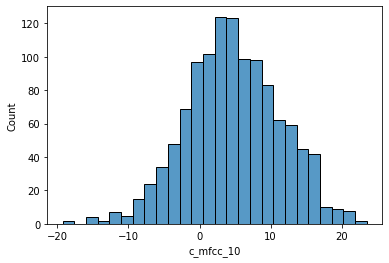

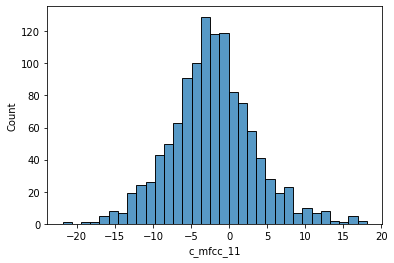

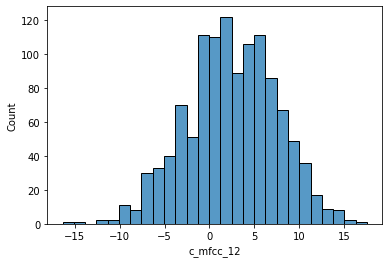

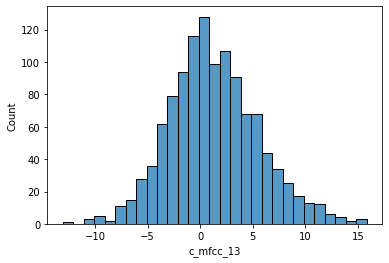

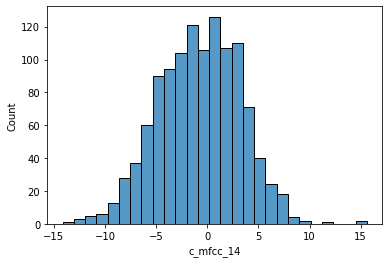

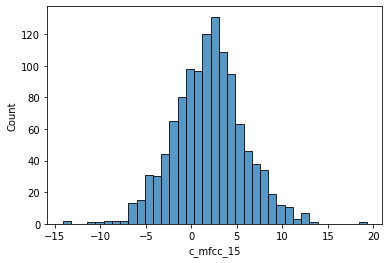

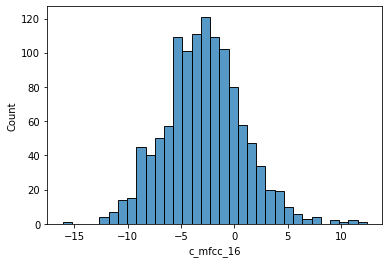

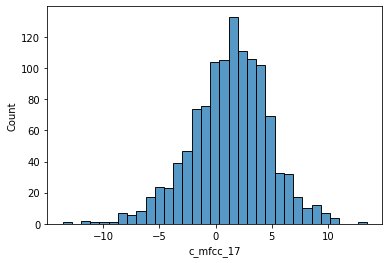

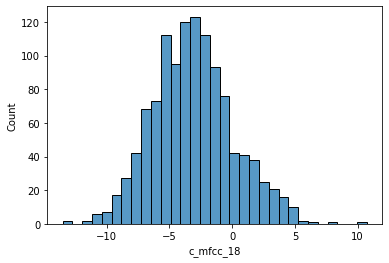

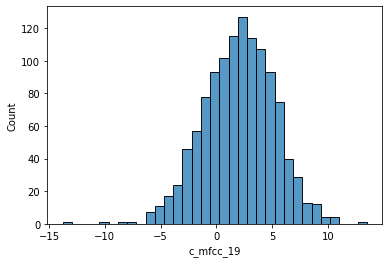

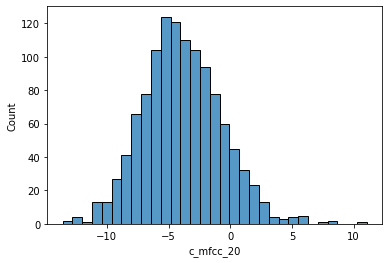

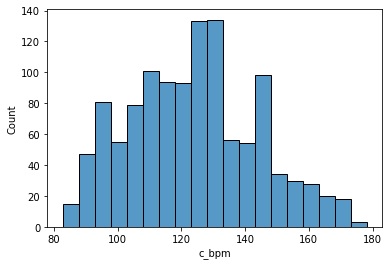

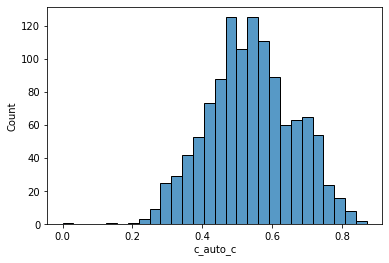

In [21]:
for i in continuas:
    sns.histplot(df[i])
    plt.savefig(f'{viz_path}{i}_distplot.png')
    plt.show()

In [22]:
df.groupby('tgt').mean()

c_zero_cr  c_spectral_centroid  c_spectral_bw  c_spectral_rf  c_croma  \
tgt                                                                          
mg    6.689306          2980.478252    3205.981151    6253.136197  0.48197   
no    5.220374          2890.098497    3355.023903    6249.178718  0.42527   

     c_norm_main_signal  c_norm_amplitude_db    c_mfcc_1    c_mfcc_2  \
tgt                                                                    
mg         21058.139814         74510.089374 -124.448938  135.858146   
no         21705.231540         61165.777195 -134.430205  131.942944   

      c_mfcc_3   c_mfcc_4   c_mfcc_5   c_mfcc_6   c_mfcc_7   c_mfcc_8  \
tgt                                                                     
mg  -35.756072  47.263248  -9.541441  26.305525  -9.680754  14.519241   
no  -19.545030  41.744695 -15.341330  23.267406 -11.997699   9.859333   

     c_mfcc_9  c_mfcc_10  c_mfcc_11  c_mfcc_12  c_mfcc_13  c_mfcc_14  \
tgt                                                                    
mg  -3.026404   6.637557  -1.103115   3.282954   1.080719   0.059954   
no  -4.931254   1.894592  -3.693633   1.341050   1.572776  -1.969679   

     c_mfcc_15  c_mfcc_16  c_mfcc_17  c_mfcc_18  c_mfcc_19  c_mfcc_20  \
tgt                                                                     
mg    2.262265  -2.377978   1.382151  -2.592797   2.386931  -3.687427   
no    1.417194  -3.598128   1.106350  -3.873544   1.464975  -4.206148   

          c_bpm  c_auto_c  
tgt                        
mg   122.528244  0.563953  
no   125.877145  0.500779

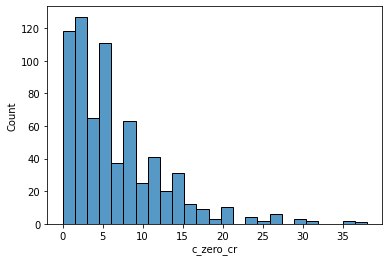

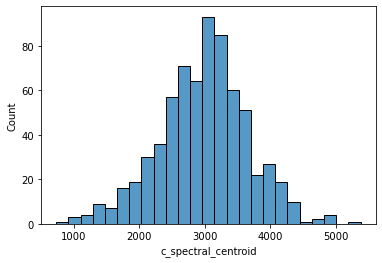

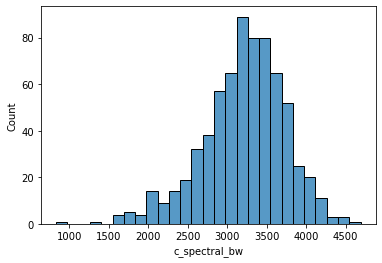

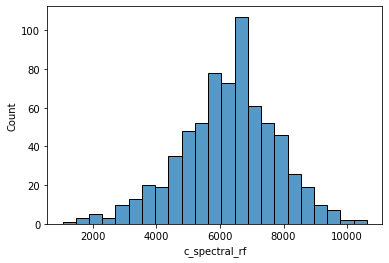

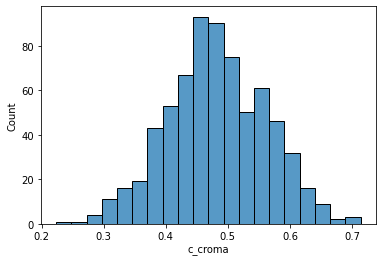

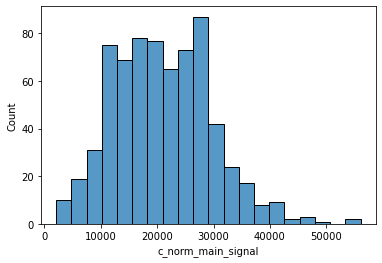

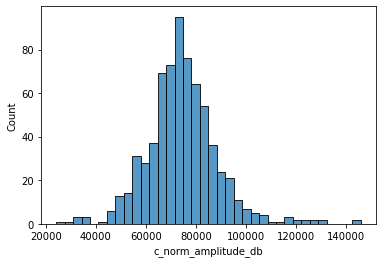

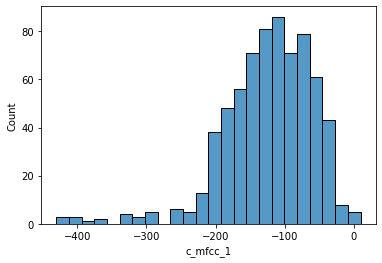

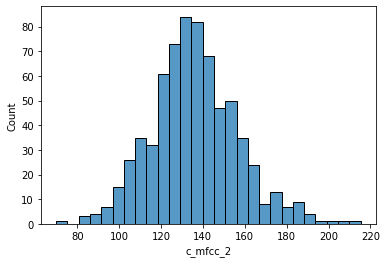

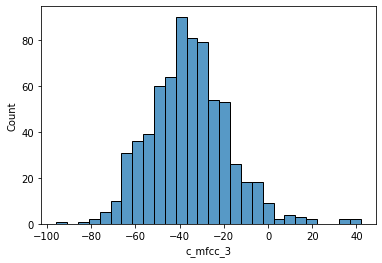

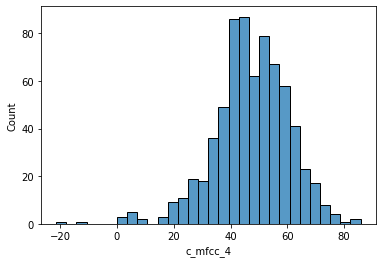

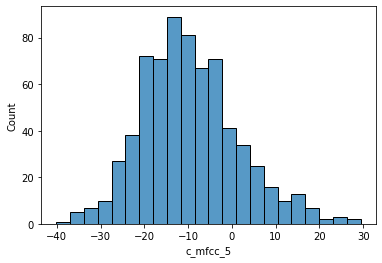

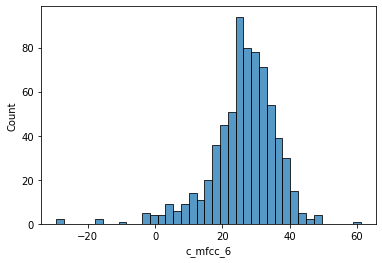

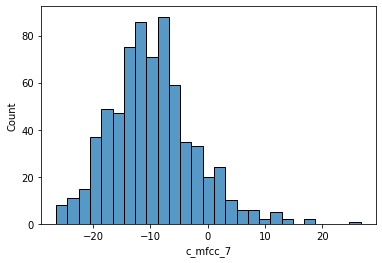

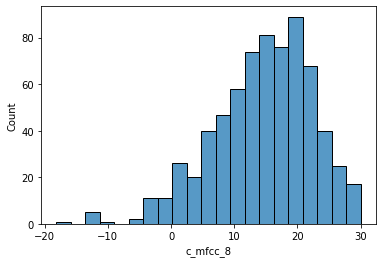

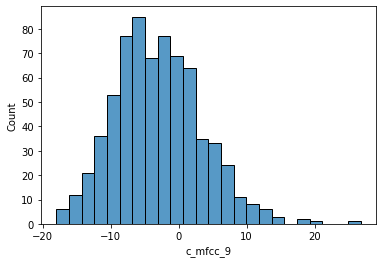

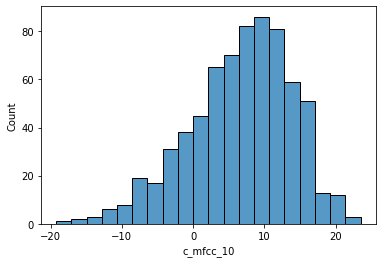

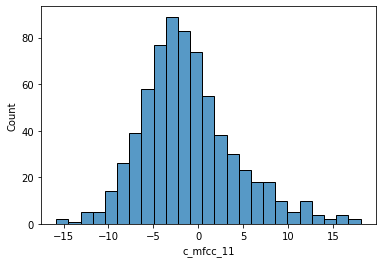

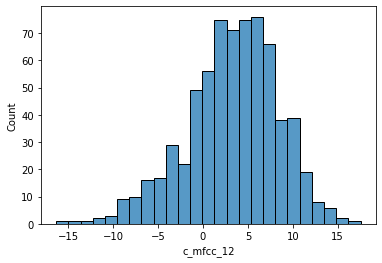

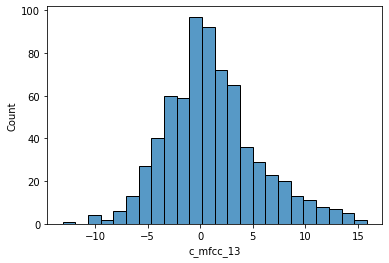

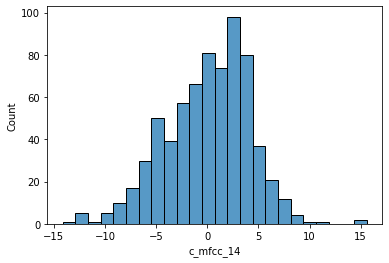

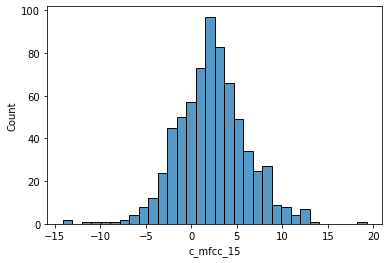

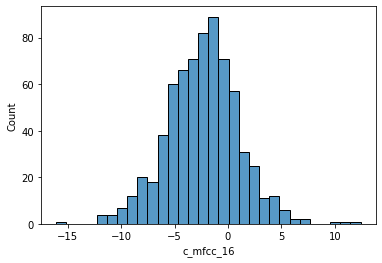

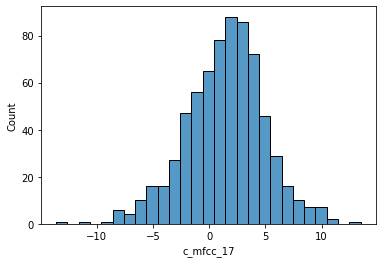

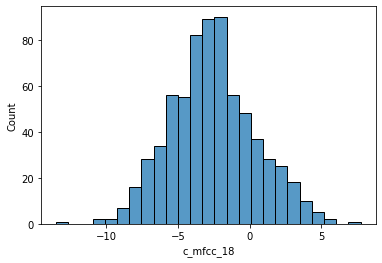

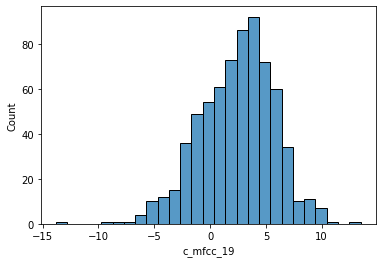

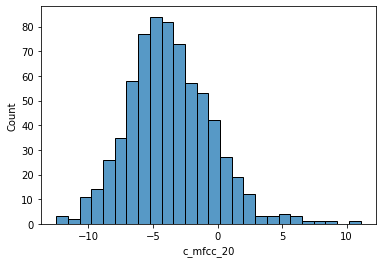

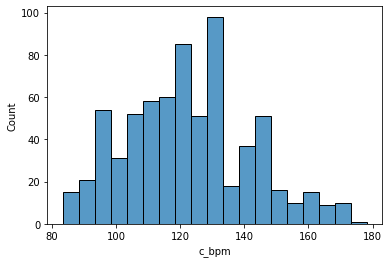

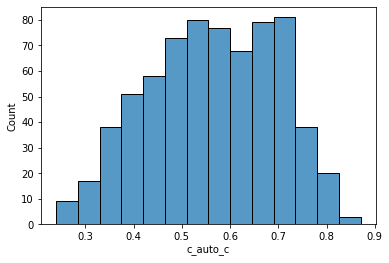

In [23]:
for i in continuas:
    sns.histplot(df_mg[i])
    plt.savefig(f'{viz_path}{i}_distplot_mg.png')
    plt.show()

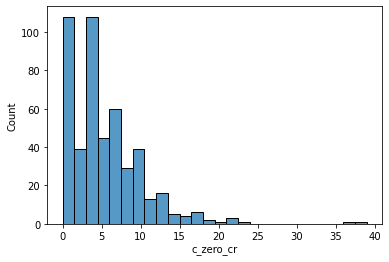

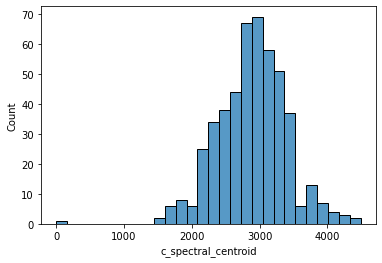

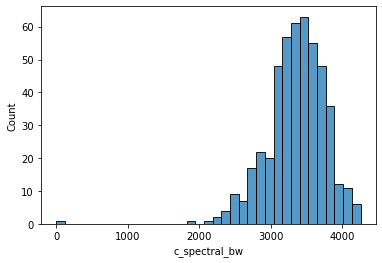

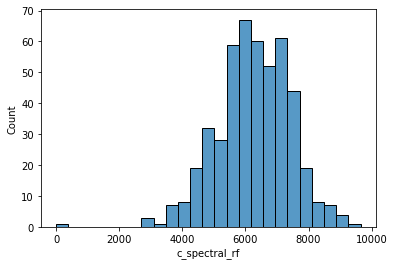

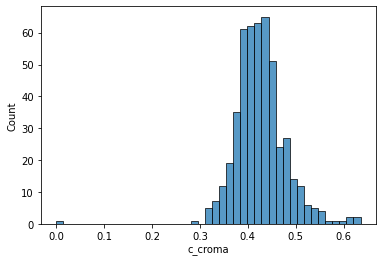

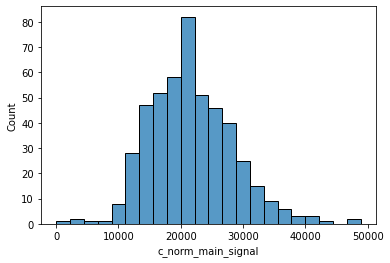

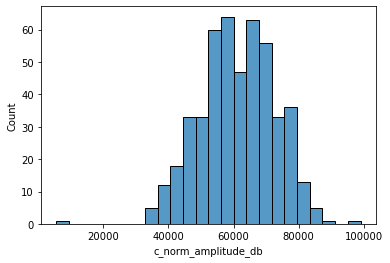

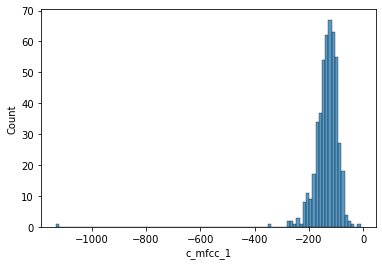

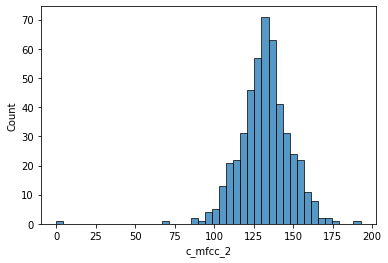

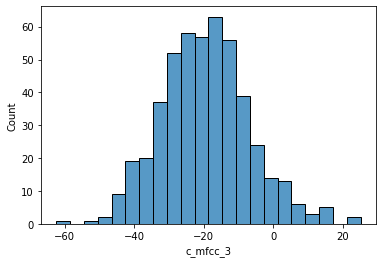

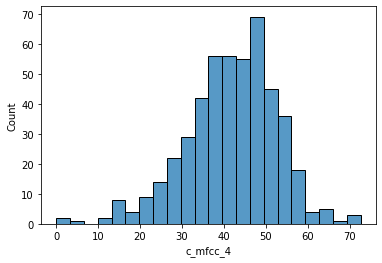

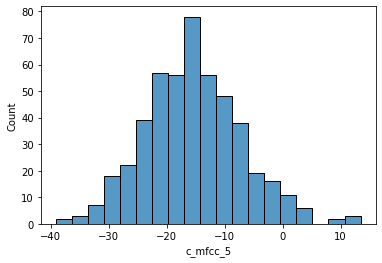

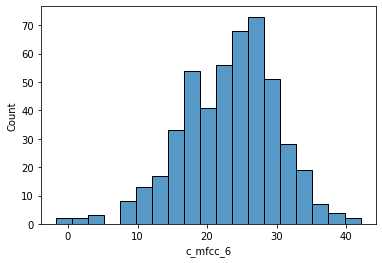

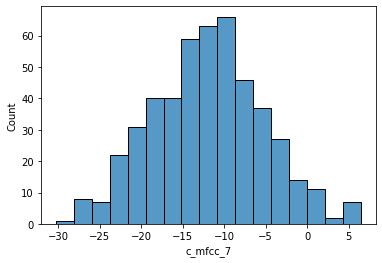

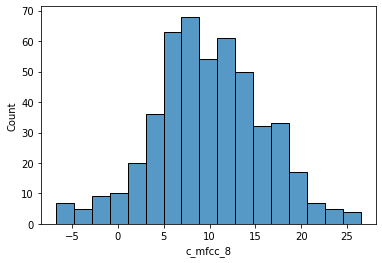

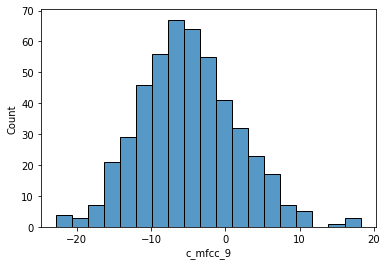

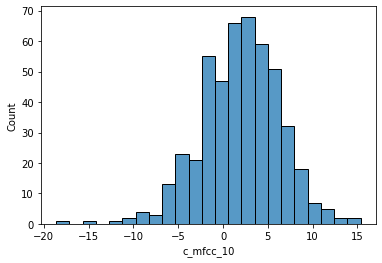

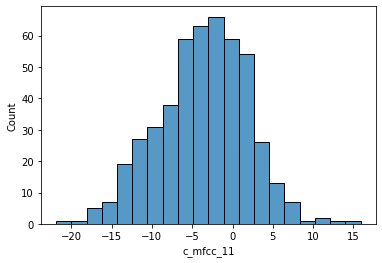

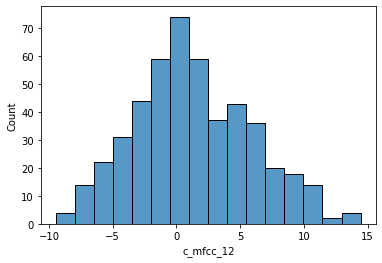

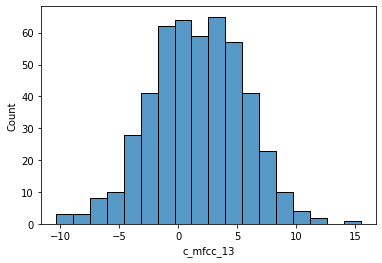

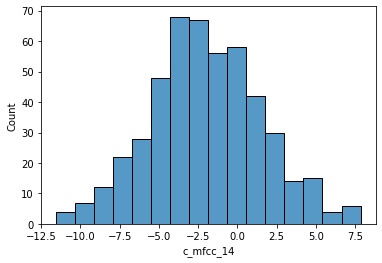

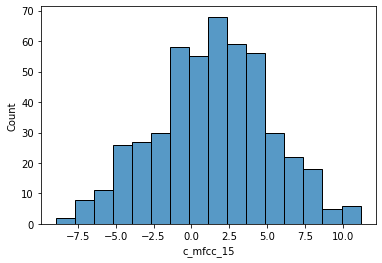

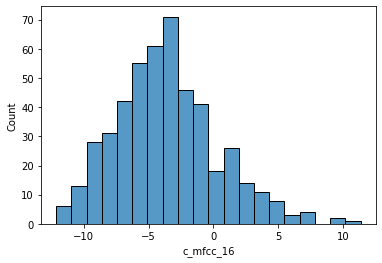

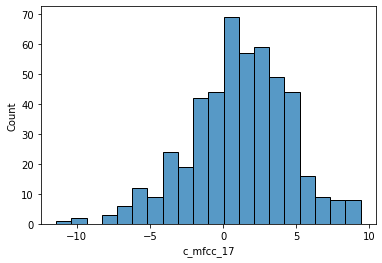

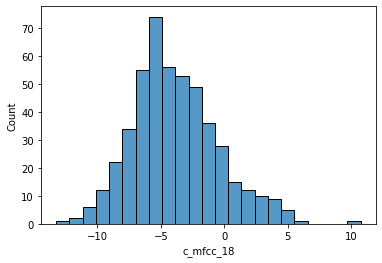

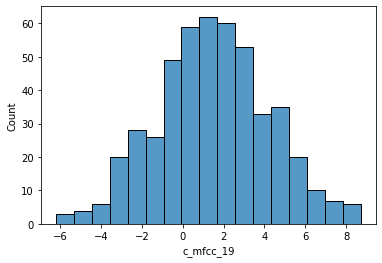

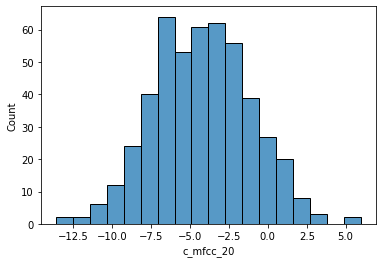

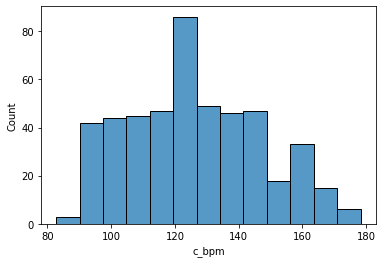

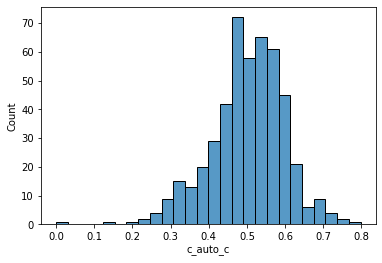

In [24]:
for i in continuas:
    sns.histplot(df_no[i])
    plt.savefig(f'{viz_path}{i}_distplot_no.png')
    plt.show()

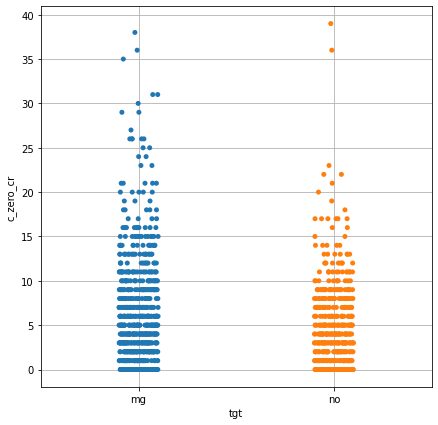

<Figure size 432x288 with 0 Axes>

In [25]:
plt.figure(figsize=(7, 7))
sns.stripplot(x="tgt", y="c_zero_cr", data=df)
plt.grid()
plt.show()
plt.savefig(viz_path + 'strip_zcr.jpg')

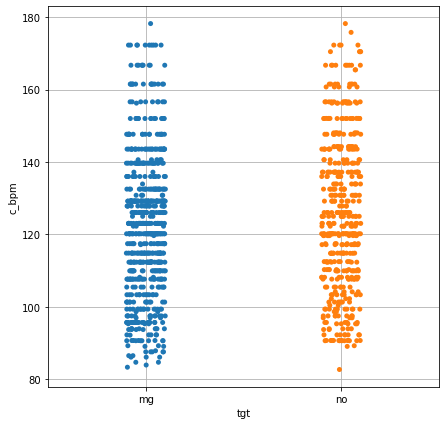

<Figure size 432x288 with 0 Axes>

In [26]:
plt.figure(figsize=(7, 7))
sns.stripplot(x="tgt", y="c_bpm", data=df)
plt.grid()
plt.show()
plt.savefig(viz_path + 'strip_bpm.jpg')

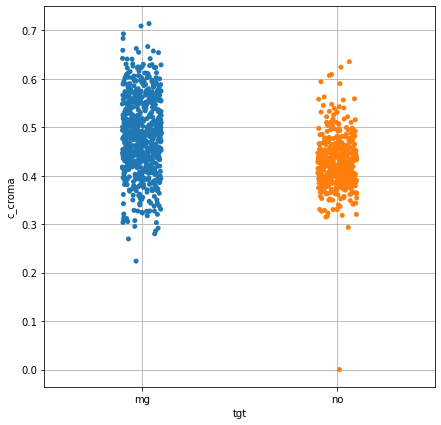

<Figure size 432x288 with 0 Axes>

In [27]:
plt.figure(figsize=(7, 7))
sns.stripplot(x="tgt", y="c_croma", data=df)
plt.grid()
plt.show()
plt.savefig(viz_path + 'strip_croma.jpg')

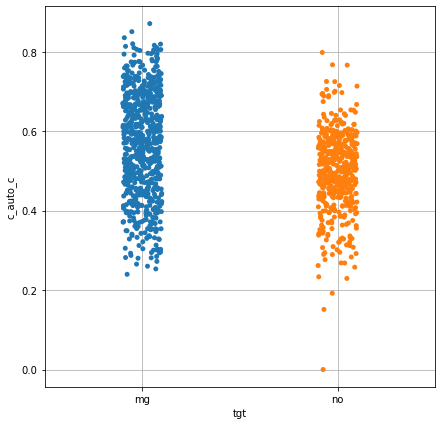

<Figure size 432x288 with 0 Axes>

In [28]:
plt.figure(figsize=(7, 7))
sns.stripplot(x="tgt", y="c_auto_c", data=df)
plt.grid()
plt.show()
plt.savefig(viz_path + 'strip_auto_correlation.jpg')

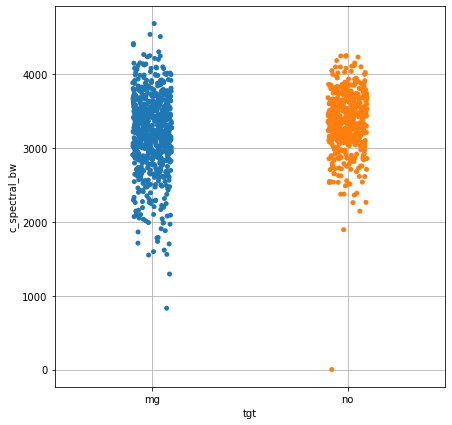

<Figure size 432x288 with 0 Axes>

In [29]:
plt.figure(figsize=(7, 7))
sns.stripplot(x="tgt", y="c_spectral_bw", data=df)
plt.grid()
plt.show()
plt.savefig(viz_path + 'strip_spectral_bw.jpg')

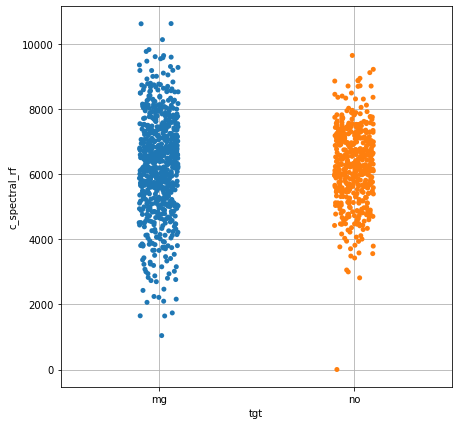

<Figure size 432x288 with 0 Axes>

In [30]:
plt.figure(figsize=(7, 7))
sns.stripplot(x="tgt", y="c_spectral_rf", data=df)
plt.grid()
plt.show()
plt.savefig(viz_path + 'strip_spectral_rf.jpg')

/Users/sqpr14_/opt/anaconda3/envs/DSS2/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning:

6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



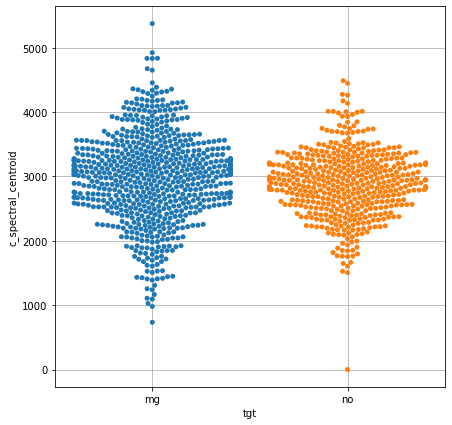

In [31]:
plt.figure(figsize=(7, 7))
sns.swarmplot(x="tgt", y="c_spectral_centroid", data=df)
plt.grid()
plt.show()

In [32]:
df_viz = df[['c_zero_cr', 'c_spectral_centroid', 'c_spectral_bw', 'c_spectral_rf', 'c_croma', 'c_bpm',
             'c_auto_c', 'c_norm_main_signal', 'c_norm_amplitude_db', 'tgt']]

In [33]:
df_viz.head()

c_zero_cr  c_spectral_centroid  c_spectral_bw  c_spectral_rf   c_croma  \
0         18          3718.611460    4018.727749    8496.157681  0.445984   
1          7          3939.607756    3609.940440    7792.548149  0.521793   
2         14          3520.858827    3781.587057    7853.945273  0.589852   
3          4          3170.852573    3558.395446    7077.203394  0.478351   
4          0          3031.185078    3008.042682    6038.769985  0.609179   

        c_bpm  c_auto_c  c_norm_main_signal  c_norm_amplitude_db tgt  
0  107.666016  0.669199         27198.66602          67515.32813  mg  
1  139.674831  0.734163         12548.87109          80284.07813  mg  
2   97.508844  0.328608         25798.61133          78596.86719  mg  
3  129.199219  0.621544         30418.28320          71925.75781  mg  
4  143.554688  0.642062         33014.41406          75295.16406  mg

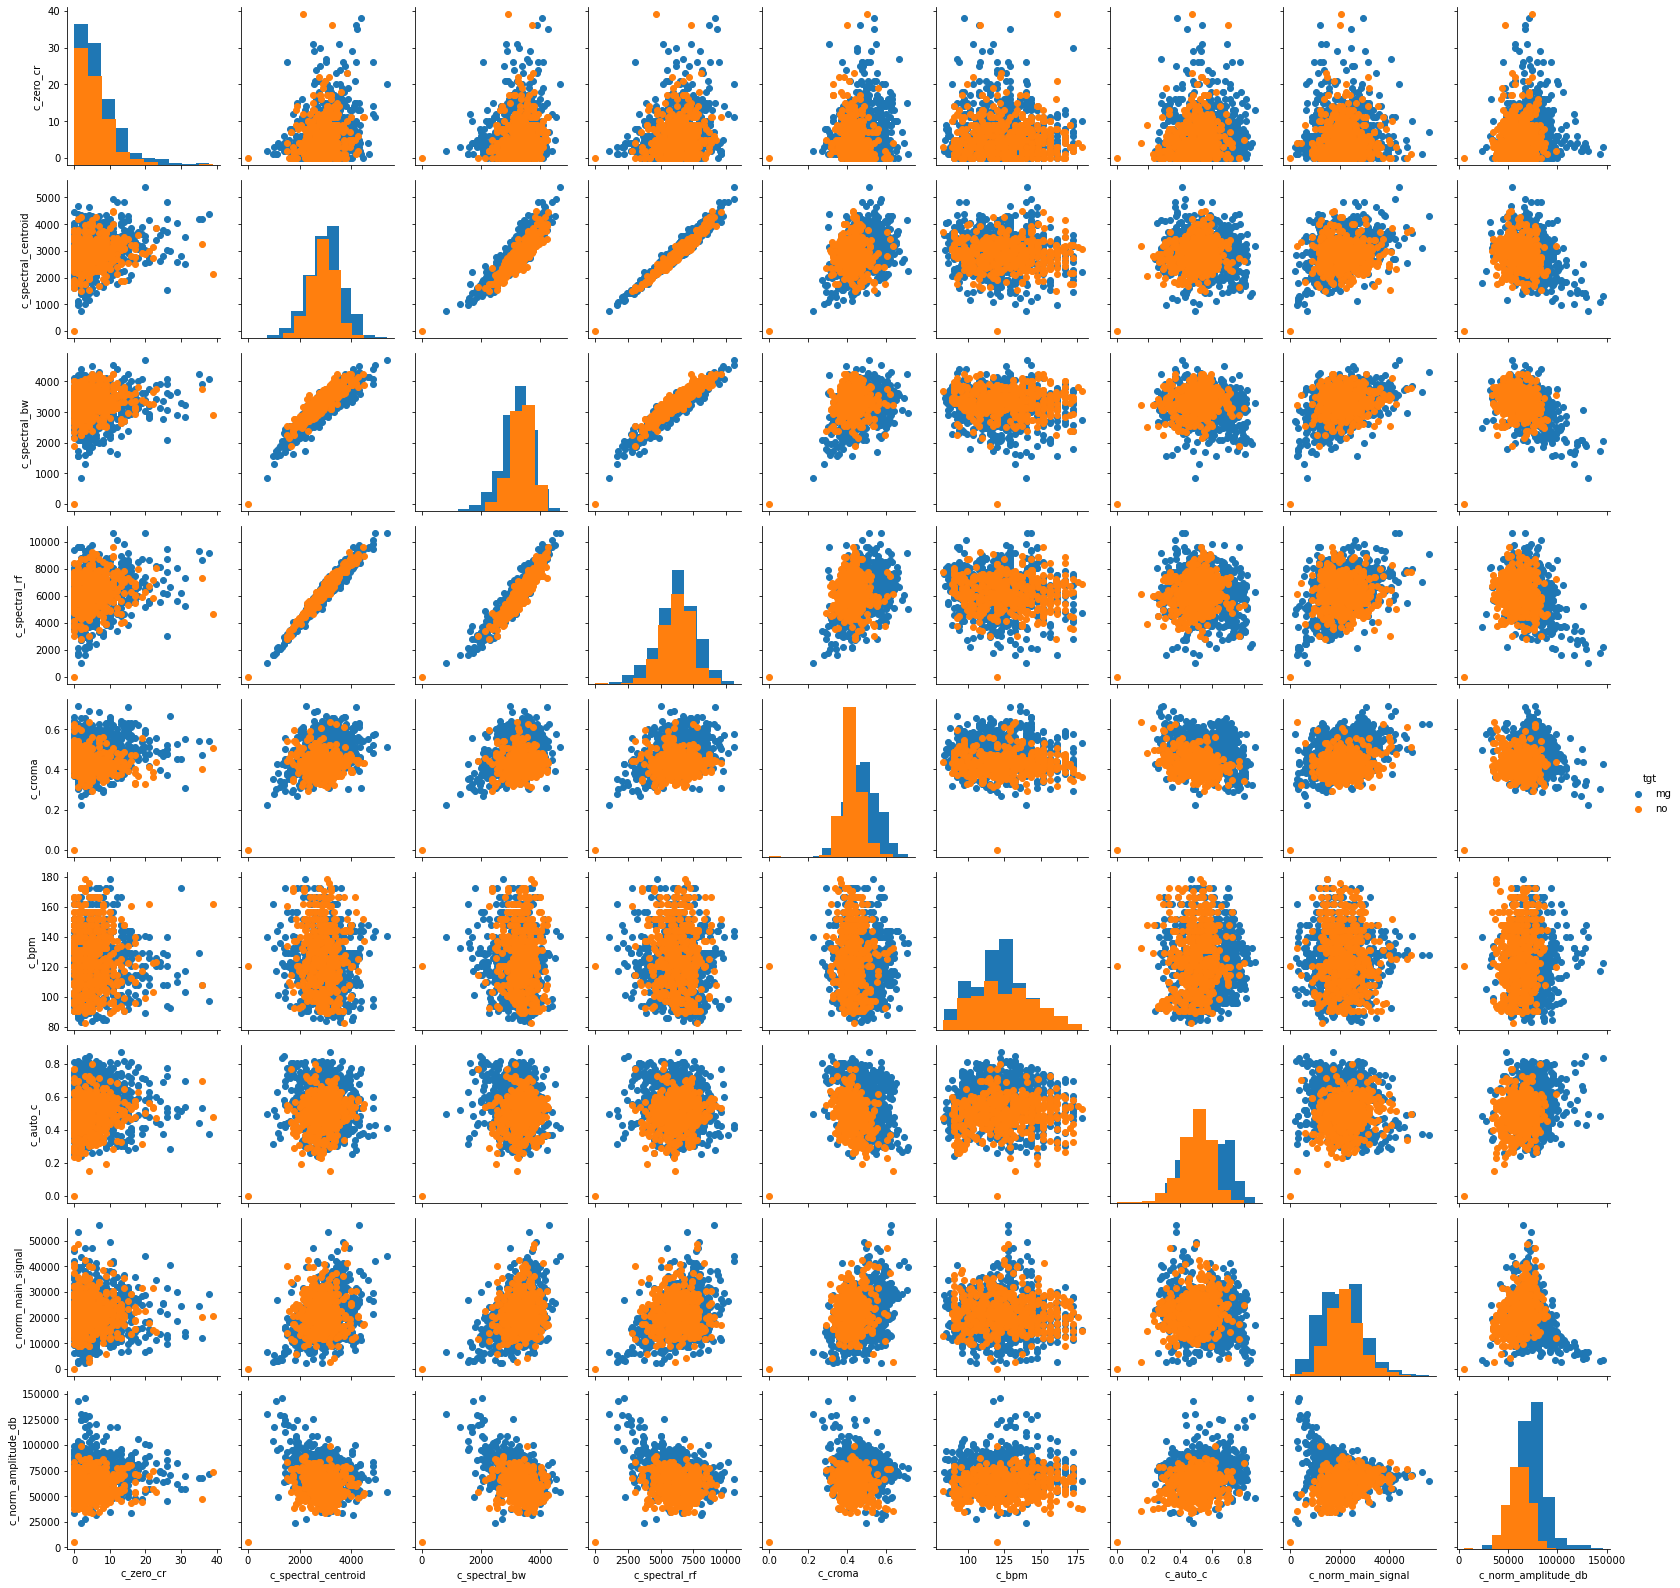

<Figure size 432x288 with 0 Axes>

In [34]:
g = sns.PairGrid(df_viz, hue="tgt")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();
plt.show()
plt.savefig(viz_path + 'pairplot.png')

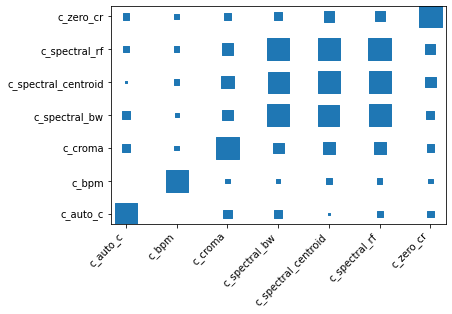

In [35]:
def heatmap(x, y, size):
    fig, ax = plt.subplots()
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num),
        y=y.map(y_to_num), 
        s=size * size_scale, 
        marker='s' 
    )
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
data = df
columns = ['c_zero_cr', 'c_spectral_centroid', 'c_spectral_bw', 'c_spectral_rf', 'c_croma', 'c_bpm', 'c_auto_c'] 
corr = data[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index') 
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)


In [36]:
df_pg = df.groupby('tgt').mean()

In [37]:
paleta = dict(zip(df_pg.c_zero_cr.unique(), ["orange","yellow","brown"]))
colores = df_pg.c_zero_cr.map(paleta)



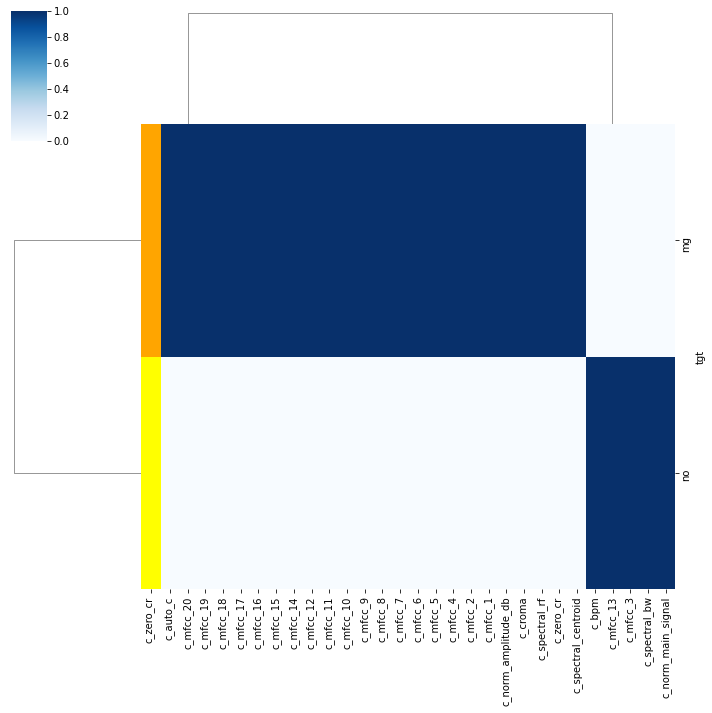

In [38]:
sns.clustermap(df_pg, metric="correlation", method="single", cmap="Blues", standard_scale=1, row_colors=colores)

# Revisión de datos anómalos

In [39]:

def OUTLIERS(df,cols):
    results=pd.DataFrame()
    data_iqr=df.copy()
    data_per=df.copy()
    total=[]
    total_per=[]
    total_z=[]
    indices_=[]

    for col in cols:
        #IQR
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
        INF=Q1-1.5*(IQR)
        SUP=Q3+1.5*(IQR)


        n_outliers=df[(df[col] < INF) | (df[col] > SUP)].shape[0]
        total.append(n_outliers)
        indices_iqr=list(df[(df[col] < INF) | (df[col] > SUP)].index)
        #data_iqr=data_iqr[~(data_iqr[col] < INF) | (data_iqr[col] > SUP)].reset_index(drop=True)

        #Percentiles
        INF_pe=np.percentile(df[col].dropna(),5)

        SUP_pe=np.percentile(df[col].dropna(),95)
        n_outliers_per=df[(df[col] < INF_pe) | (df[col] > SUP_pe)].shape[0]
        total_per.append(n_outliers_per)
        indices_per=list(df[(df[col] < INF_pe) | (df[col] > SUP_pe)].index)
        #data_per=data_per[~(data_per[col] < INF_pe) | (data_per[col] > SUP_pe)].reset_index(drop=True)

        #MEAN CHANGE

        #Obtenemos todos los percentiles además del máximo
        perc_100 = [x / 100 for x in range(100)]
        dist = df[col].describe(perc_100).iloc[4:]
        #Obtenemos el cambio entre percentiles
        change_dist = df[col].describe(perc_100).iloc[4:].diff()
        #Obtenemos el cambio promedio entre percentiles
        mean_change = df[col].describe(
            perc_100).iloc[4:].diff().mean()
        #Si el cambio entre el percentil 99 y el maximo es mayor a el cambio promedio entonces:
        if change_dist["max"] > mean_change:
            #La banda superior será el máximo menos el cambio promedio
            ub = dist["max"] - mean_change
            #si la banda superior es más pequeña que el percentil 99 , modificamos la banda para que tome el percentil 99
            if ub < dist["99%"]:
                ub = dist["99%"]
        else:
            #Si el cambio entre el percentil 99 y el maximo es menor o igual a el cambio promedio entonces se toma el percentil 99
            ub = dist["max"]

        if change_dist["1%"] > mean_change:
            lb = dist["0%"] + mean_change
            if lb > dist["1%"]:
                lb = dist["1%"]
        else:
            lb = dist["0%"]
        n_total_z=df[(df[col] < lb) | (df[col] > ub)].shape[0]
        total_z.append(n_total_z)
        indices_z=list(df[(df[col] < lb) | (df[col] > ub)].index)

        indices_.append(aux_outliers(indices_iqr,indices_per,indices_z))

    results["features"]=cols
    results["n_outliers_IQR"]=total
    results["n_outliers_Percentil"]=total_per
    results["n_outliers_Mean_Change"]=total_z
    results["n_outliers_IQR_%"]=round((results["n_outliers_IQR"]/df.shape[0])*100,2)
    results["n_outliers_Percentil_%"]=round((results["n_outliers_Percentil"]/df.shape[0])*100,2)
    results["n_outliers_Mean_Change_%"]=round((results["n_outliers_Mean_Change"]/df.shape[0])*100,2)
    results["indices"]=indices_
    results["total_outliers"]=results["indices"].map(lambda x:len(x))
    results["%_outliers"]=results["indices"].map(lambda x:round(((len(x)/df.shape[0])*100),2))
    results=results[['features', 'n_outliers_IQR', 'n_outliers_Percentil',
                     'n_outliers_Mean_Change', 'n_outliers_IQR_%', 'n_outliers_Percentil_%',
                     'n_outliers_Mean_Change_%',  'total_outliers', '%_outliers','indices']]
    return results

def aux_outliers(a,b,c):
    a=set(a)
    b=set(b)
    c=set(c)

    a_=a.intersection(b)

    b_=b.intersection(c)

    c_=a.intersection(c)

    outliers_index=list(set(list(a_)+list(b_)+list(c_)))
    return outliers_index


In [40]:
for c in df.filter(like='c_'):
    graph.box(df, c, c).show()

In [41]:
for c in df.filter(like='c_'):
    graph.histogram(df, c, 10, c).show()

In [42]:
i = OUTLIERS(df, list(df.filter(like='c_')))

In [43]:
i

features  n_outliers_IQR  n_outliers_Percentil  \
0             c_zero_cr              37                    57   
1   c_spectral_centroid              28                   118   
2         c_spectral_bw              34                   118   
3         c_spectral_rf              25                   118   
4               c_croma              12                   118   
5    c_norm_main_signal              10                   118   
6   c_norm_amplitude_db              23                   118   
7              c_mfcc_1              34                   118   
8              c_mfcc_2              34                   118   
9              c_mfcc_3              12                   118   
10             c_mfcc_4              32                   118   
11             c_mfcc_5              30                   118   
12             c_mfcc_6              40                   118   
13             c_mfcc_7              19                   118   
14             c_mfcc_8               7                   118   
15             c_mfcc_9              14                   118   
16            c_mfcc_10               9                   118   
17            c_mfcc_11              37                   118   
18            c_mfcc_12               6                   118   
19            c_mfcc_13              21                   118   
20            c_mfcc_14               6                   118   
21            c_mfcc_15              19                   118   
22            c_mfcc_16              14                   118   
23            c_mfcc_17              19                   118   
24            c_mfcc_18               9                   118   
25            c_mfcc_19               6                   118   
26            c_mfcc_20              16                   118   
27                c_bpm               2                    90   
28             c_auto_c               3                   118   

    n_outliers_Mean_Change  n_outliers_IQR_%  n_outliers_Percentil_%  \
0                        1              3.15                    4.86   
1                        2              2.39                   10.06   
2                        2              2.90                   10.06   
3                        3              2.13                   10.06   
4                        3              1.02                   10.06   
5                        2              0.85                   10.06   
6                        2              1.96                   10.06   
7                        3              2.90                   10.06   
8                        2              2.90                   10.06   
9                        2              1.02                   10.06   
10                       2              2.73                   10.06   
11                       2              2.56                   10.06   
12                       2              3.41                   10.06   
13                       2              1.62                   10.06   
14                       3              0.60                   10.06   
15                       2              1.19                   10.06   
16                       2              0.77                   10.06   
17                       2              3.15                   10.06   
18                       2              0.51                   10.06   
19                       2              1.79                   10.06   
20                       2              0.51                   10.06   
21                       3              1.62                   10.06   
22                       2              1.19                   10.06   
23                       2              1.62                   10.06   
24                       2              0.77                   10.06   
25                       2              0.51                   10.06   
26                       3              1.36                   10.06   
27                       4              0.17    

In [44]:
i = list(i['indices'].values)

In [45]:
from  functools import reduce
i=list(set(reduce(lambda x,y: x+y, i)))

In [46]:
df_aux = df.drop(df.loc[i].index)

In [47]:
df_aux

t_archivo  c_zero_cr  \
0                                   crop_139ORACION.mp3         18   
1                               crop_08Seek&Destroy.mp3          7   
2                              crop_02Rollercoaster.mp3         14   
3                           crop_11BringEmBackAlive.mp3          4   
4                         crop_4-04BodomBeachTerror.mp3          0   
...                                                 ...        ...   
1168           crop_136ATravésDelVaso-GrupoArranke.mp3          2   
1169  crop_118NUNCADUDESENLLAMARME-laarrolladoraft.a...         14   
1170          crop_063PORSIMEADELANTO-indalferochoa.mp3          4   
1171            crop_090MALDITAINFIEL-victorjimenez.mp3          5   
1172            crop_113SiTePudieraMentir-calibre50.mp3          3   

      c_spectral_centroid  c_spectral_bw  c_spectral_rf   c_croma  \
0             3718.611460    4018.727749    8496.157681  0.445984   
1             3939.607756    3609.940440    7792.548149  0.521793   
2             3520.858827    3781.587057    7853.945273  0.589852   
3             3170.852573    3558.395446    7077.203394  0.478351   
4             3031.185078    3008.042682    6038.769985  0.609179   
...                   ...            ...            ...       ...   
1168          2526.134329    3130.413153    5407.134468  0.400143   
1169          3087.403503    3712.989699    7239.474451  0.435936   
1170          2949.057555    3367.342574    6389.341732  0.411267   
1171          2579.898912    3437.647903    5483.399664  0.393433   
1172          2794.890539    3391.299250    6194.051124  0.484172   

      c_norm_main_signal  c_norm_amplitude_db    c_mfcc_1    c_mfcc_2  \
0            27198.66602          67515.32813  -63.776653  120.569939   
1            12548.87109          80284.07813 -120.306099  110.507179   
2            25798.61133          78596.86719  -91.056770  136.933136   
3            30418.28320          71925.75781  -55.035664  134.748535   
4            33014.41406          75295.16406  -32.878361  140.106186   
...                  ...                  ...         ...         ...   
1168         23347.01367          55702.85156 -111.059181  141.210251   
1169         20917.24414          61139.09375  -97.413780  136.543304   
1170         20878.24414          63555.60938 -105.970596  136.958420   
1171         30992.10156          48788.66797  -72.263466  146.987549   
1172         24615.94922          79815.33594 -139.384109  137.787247   

       c_mfcc_3   c_mfcc_4   c_mfcc_5   c_mfcc_6   c_mfcc_7   c_mfcc_8  \
0    -27.781075  55.227997 -13.120267  44.324890 -19.253584  20.555710   
1    -55.008266  60.533909  -4.303230  28.537308 -19.065107  20.665205   
2    -25.539619  34.552818 -17.252773  31.749672 -15.516705  22.577166   
3    -36.235176  54.622887 -11.031491  41.575623 -11.967165  21.469402   
4    -68.551979  58.522602 -11.411274  31.303116  -2.930590  23.466887   
...         ...        ...        ...        ...        ...        ...   
1168 -23.920067  35.316315 -16.865156  17.451200 -16.229662  18.132135   
1169 -18.827883  50.943485 -18.172623  31.491049 -22.635208  13.103129   
1170 -30.449446  39.111546 -14.781728  21.980438 -22.352400   9.764993   
1171 -20.749092  49.434738  -7.432476  25.664446 -12.105811  15.426386   
1172 -20.138784  46.177990 -12.918496  26.731686  -1.088614   7.361919   

       c_mfcc_9  c_mfcc_10  c_mfcc_11  c_mfcc_12  c_mfcc_13  c_mfcc_14  \
0    -12.720412  10.786198  -8.986979   6.804733  -2.328667   2.900476   
1     -7.360394  13.713191  -3.508204  11.447392  -3.354587   3.111072   
2    -11.772463  20.277536  -5.628073  13.310594  -3.628814   5.675441   
3     -7.646917  10.554090  -3.116514   4.732285  -1.134986   2.137828   
4      2.560016  17.451509  -1.017287   5.120934   6.781217  -0.232262   
...         ...        ...        ...        ...        ...        ...   
1168  -5.828166   3.372531  -2.505853  -1.270407   4.400780  -5.505640   
1169 -19.045912   

In [48]:
for c in df_aux.filter(like='c_'):
    graph.histogram(df_aux, c, 10, c).show()

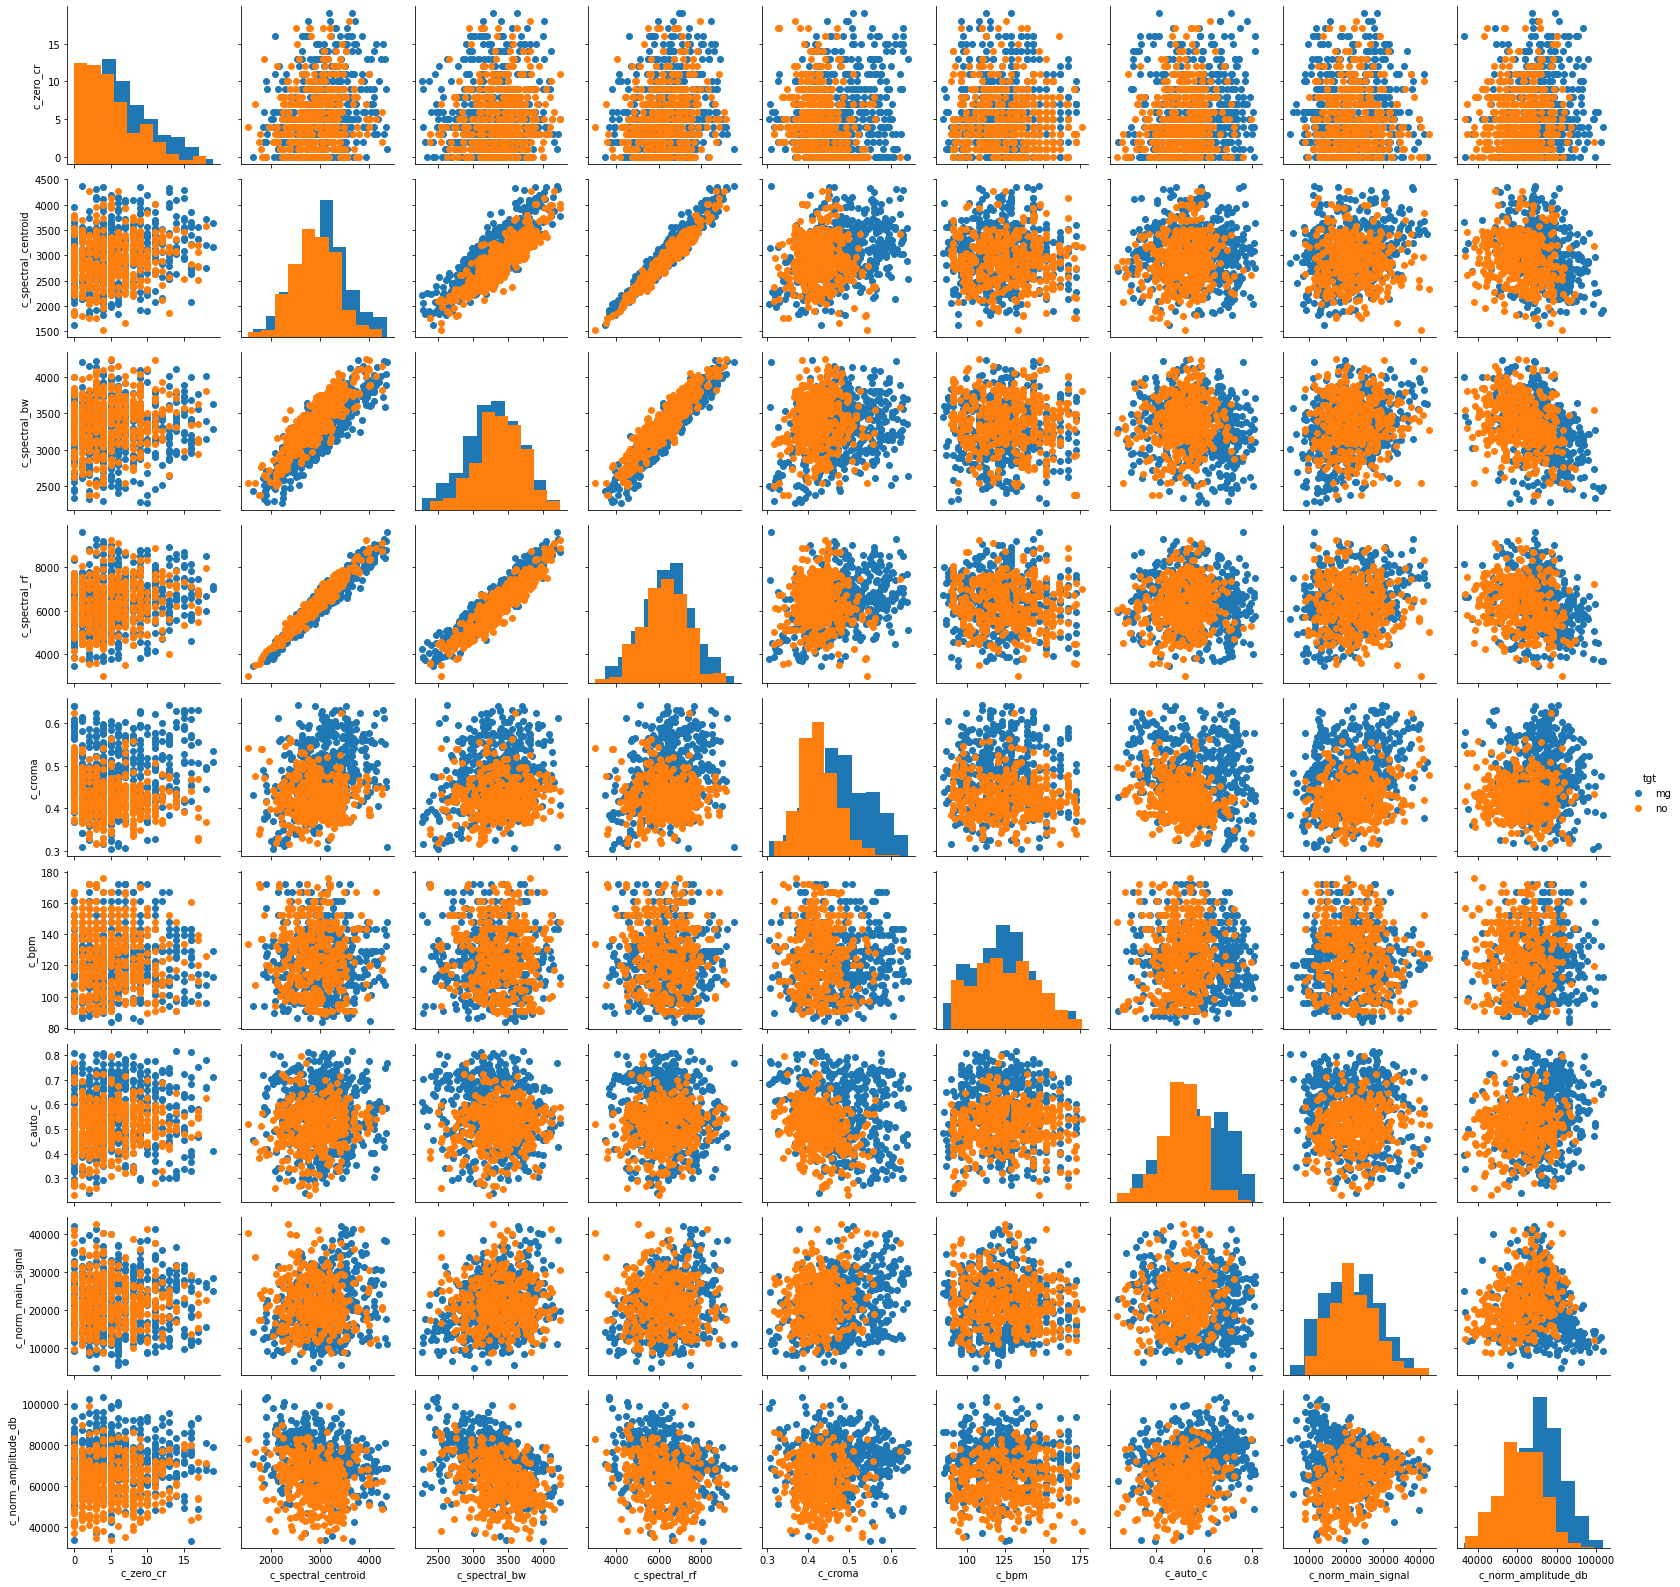

<Figure size 432x288 with 0 Axes>

In [49]:
df_viz = df_aux[['c_zero_cr', 'c_spectral_centroid', 'c_spectral_bw', 'c_spectral_rf', 'c_croma', 'c_bpm',
             'c_auto_c', 'c_norm_main_signal', 'c_norm_amplitude_db', 'tgt']]
g = sns.PairGrid(df_viz, hue="tgt")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();
plt.show()
plt.savefig(viz_path + 'pairplot.png')

 # Tratamiento de valores faltantes

No existen valores faltantes para este caso.

# Tabla final

Para la tabla final se exportarán el data set primigéneo y el data set sin los outliers

In [50]:
df_aux.to_csv(data_path + 'datos_musica_new_sa.csv', index=False)

In [51]:
df.to_csv(data_path + 'datos_musica_new.csv', index=False)